# Read all log.txt

In [62]:
import glob
import pandas as pd
from pandas.core.common import flatten
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
path = "D:/Dev/ReinforcementLearning/results/CartPole-v1/"

In [3]:
logs = glob.glob(path + "/*/*/*.txt")

In [4]:
def read_file(path):
    values = []
    col = path.split("\\")[-2].split("_")
           
    with open(path, "r") as file:
        for i in file.readlines():
            values.append([path.split("\\")[-3],*col,*i.split("\n")[0].split(",")])
    return values

In [5]:
columns = ["algo","step_train","batch_size", "gamma", "greedy_exploration","network","", "optimizer", "lr", "memories", "max_size", "step", "max", "min", "avg", "sum"]

In [6]:
df = pd.DataFrame([], columns = columns)
for file in logs:
    ite = pd.DataFrame(read_file(file), columns = columns)
    df = pd.concat([df,ite],  ignore_index=True)

# Result

In [7]:
df.head(10)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
0,CategoricalDQN,1,1,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,C51Network,,Adam,0.0001,ExperienceReplay,128,1,1.0,1.0,1.0,9.0
1,CategoricalDQN,1,1,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,C51Network,,Adam,0.0001,ExperienceReplay,128,166,1.0,1.0,1.0,10.0
2,CategoricalDQN,1,1,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,C51Network,,Adam,0.0001,ExperienceReplay,128,332,1.0,1.0,1.0,9.0
3,CategoricalDQN,1,1,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,C51Network,,Adam,0.0001,ExperienceReplay,128,498,1.0,1.0,1.0,11.0
4,CategoricalDQN,1,1,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,C51Network,,Adam,0.0001,ExperienceReplay,128,500,1.0,1.0,1.0,9.0
5,CategoricalDQN,1,1,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,C51Network,,Adam,0.0001,ExperienceReplay,16,1,1.0,1.0,1.0,14.0
6,CategoricalDQN,1,1,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,C51Network,,Adam,0.0001,ExperienceReplay,16,166,1.0,1.0,1.0,8.0
7,CategoricalDQN,1,1,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,C51Network,,Adam,0.0001,ExperienceReplay,16,332,1.0,1.0,1.0,9.0
8,CategoricalDQN,1,1,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,C51Network,,Adam,0.0001,ExperienceReplay,16,498,1.0,1.0,1.0,10.0
9,CategoricalDQN,1,1,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,C51Network,,Adam,0.0001,ExperienceReplay,16,500,1.0,1.0,1.0,10.0


## Sort by sum and step

In [8]:
for c in ["step_train", "batch_size", "gamma", "lr", "step", "max", "min", "avg", "sum"]:
    df[c] = df[c].astype(float)
for c in df.columns:
    if df[c].dtypes  == "object":
        df[c] = df[c].astype('category')

In [9]:
df.sort_values(by =["sum","step"],  ascending = [False, True]).head(50)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
3436,DQN,1.0,32.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,SimpleNetwork,,Adam,0.0010,ExperienceReplay,128,166.0,1.0,1.0,1.0,500.0
3711,DQN,1.0,64.0,0.99,EpsilonGreedy-0.1,SimpleNetwork,,Adam,0.0010,ExperienceReplay,16,166.0,1.0,1.0,1.0,500.0
4176,DQN,32.0,64.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,SimpleNetwork,,Adam,0.1000,ExperienceReplay,16,166.0,1.0,1.0,1.0,500.0
2117,DoubleDQN,1.0,64.0,0.99,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.0001,ExperienceReplay,128,332.0,1.0,1.0,1.0,500.0
3442,DQN,1.0,32.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,SimpleNetwork,,Adam,0.0010,ExperienceReplay,16,332.0,1.0,1.0,1.0,500.0
3537,DQN,1.0,32.0,0.99,EpsilonGreedy-0.1,SimpleNetwork,,Adam,0.0010,ExperienceReplay,32,332.0,1.0,1.0,1.0,500.0
3612,DQN,1.0,64.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,SimpleNetwork,,Adam,0.0001,ExperienceReplay,32,332.0,1.0,1.0,1.0,500.0
3717,DQN,1.0,64.0,0.99,EpsilonGreedy-0.1,SimpleNetwork,,Adam,0.0010,ExperienceReplay,32,332.0,1.0,1.0,1.0,500.0
4797,DQN,4.0,64.0,0.99,EpsilonGreedy-0.1,SimpleNetwork,,Adam,0.0010,ExperienceReplay,32,332.0,1.0,1.0,1.0,500.0
1953,DoubleDQN,1.0,32.0,0.99,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.0010,ExperienceReplay,128,498.0,1.0,1.0,1.0,500.0


## Correlation matrix

In [10]:
df_corr = df.copy()

In [11]:
for c in df_corr.columns:
    try:
        df_corr[c] = df_corr[c].cat.codes
    except:
        pass

In [12]:
df_corr.corr()["sum"]

algo                  7.373685e-02
step_train           -1.697983e-01
batch_size            1.182673e-01
gamma                -5.161482e-15
greedy_exploration    2.540062e-02
network               1.525560e-01
                               NaN
optimizer                      NaN
lr                   -1.308714e-01
memories                       NaN
max_size             -1.339293e-02
step                  1.712250e-01
max                            NaN
min                            NaN
avg                            NaN
sum                   1.000000e+00
Name: sum, dtype: float64

In [13]:
df_corr.corr()

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
algo,1.000000e+00,-8.992421e-18,0.000000e+00,0.000000e+00,0.000000e+00,4.045199e-01,NaN,NaN,0.000000e+00,NaN,0.000000e+00,8.101552e-20,NaN,NaN,NaN,7.373685e-02
step_train,-8.992421e-18,1.000000e+00,1.563538e-18,-3.133980e-17,8.992421e-18,1.524091e-15,NaN,NaN,2.026146e-17,NaN,-4.809914e-20,1.297656e-20,NaN,NaN,NaN,-1.697983e-01
batch_size,0.000000e+00,1.563538e-18,1.000000e+00,0.000000e+00,0.000000e+00,1.533537e-15,NaN,NaN,-1.642472e-16,NaN,-5.221288e-20,0.000000e+00,NaN,NaN,NaN,1.182673e-01
gamma,0.000000e+00,-3.133980e-17,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,-1.533798e-14,NaN,0.000000e+00,9.148140e-17,NaN,NaN,NaN,-5.161482e-15
greedy_exploration,0.000000e+00,8.992421e-18,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,NaN,0.000000e+00,8.101552e-20,NaN,NaN,NaN,2.540062e-02
network,4.045199e-01,1.524091e-15,1.533537e-15,0.000000e+00,0.000000e+00,1.000000e+00,NaN,NaN,-1.978668e-16,NaN,0.000000e+00,2.660026e-17,NaN,NaN,NaN,1.525560e-01
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
optimizer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lr,0.000000e+00,2.026146e-17,-1.642472e-16,-1.533798e-14,0.000000e+00,-1.978668e-16,NaN,NaN,1.000000e+00,NaN,1.118946e-19,3.477634e-17,NaN,NaN,NaN,-1.308714e-01
memories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

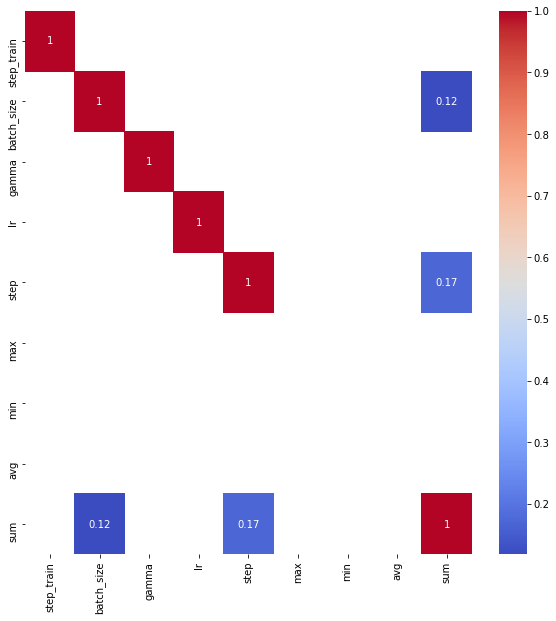

In [66]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df.corr()[df.corr() > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

## Correlation matrix for best result

In [56]:
df_corr_best = df_corr[df_corr["sum"] >= 300]

In [57]:
df_corr_best.corr()

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
algo,1.000000e+00,-2.024974e-01,-4.931761e-02,3.482840e-16,1.613751e-01,-6.653163e-01,NaN,NaN,-1.387198e-01,NaN,3.924623e-02,2.674115e-02,NaN,NaN,NaN,-3.890492e-01
step_train,-2.024974e-01,1.000000e+00,4.067992e-02,4.391100e-17,-2.457767e-01,-2.033679e-01,NaN,NaN,5.822535e-01,NaN,2.226417e-01,-2.898155e-01,NaN,NaN,NaN,-2.090821e-02
batch_size,-4.931761e-02,4.067992e-02,1.000000e+00,2.820643e-16,4.627404e-02,2.620456e-01,NaN,NaN,3.432420e-02,NaN,4.325075e-02,7.685944e-02,NaN,NaN,NaN,1.187327e-01
gamma,3.482840e-16,4.391100e-17,2.820643e-16,1.000000e+00,6.223740e-17,-3.238646e-16,NaN,NaN,1.441029e-16,NaN,1.306218e-16,-1.823356e-16,NaN,NaN,NaN,-3.410748e-16
greedy_exploration,1.613751e-01,-2.457767e-01,4.627404e-02,6.223740e-17,1.000000e+00,-7.484315e-03,NaN,NaN,-2.102527e-02,NaN,-1.114625e-01,1.432139e-01,NaN,NaN,NaN,-2.831818e-02
network,-6.653163e-01,-2.033679e-01,2.620456e-01,-3.238646e-16,-7.484315e-03,1.000000e+00,NaN,NaN,1.019551e-01,NaN,-1.256836e-01,9.331015e-02,NaN,NaN,NaN,2.632569e-01
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
optimizer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lr,-1.387198e-01,5.822535e-01,3.432420e-02,1.441029e-16,-2.102527e-02,1.019551e-01,NaN,NaN,1.000000e+00,NaN,-4.741960e-02,-1.683165e-01,NaN,NaN,NaN,7.717727e-02
memories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

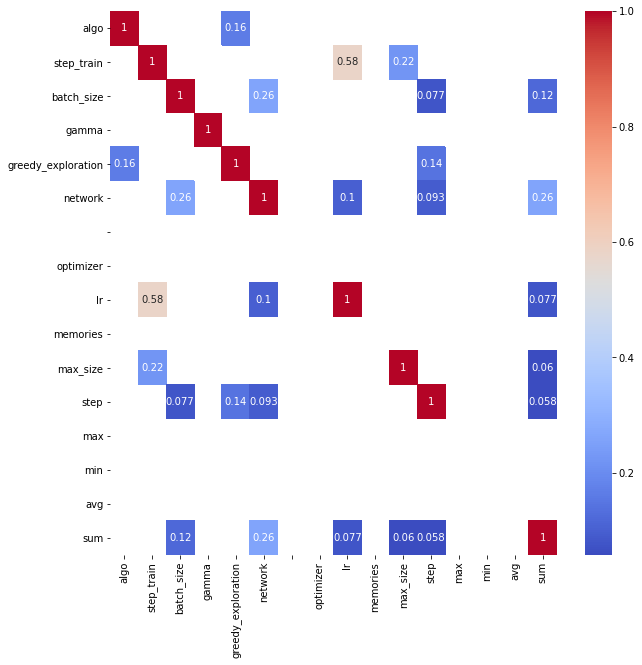

In [65]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_corr_best.corr()[df_corr_best.corr() > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

# Result by algo

### DQN

In [16]:
df_DQN = df[df["algo"] == "DQN"].copy()

In [17]:
df_DQN.corr()

,step_train,batch_size,gamma,lr,step,max,min,avg,sum
step_train,1.000000e+00,6.254152e-18,-3.338836e-15,-1.947613e-17,5.190625e-20,NaN,NaN,NaN,-2.081287e-01
batch_size,6.254152e-18,1.000000e+00,-5.096548e-15,1.309431e-16,0.000000e+00,NaN,NaN,NaN,1.477390e-01
gamma,-3.338836e-15,-5.096548e-15,1.000000e+00,1.070395e-14,-1.030754e-16,NaN,NaN,NaN,3.327095e-16
lr,-1.947613e-17,1.309431e-16,1.070395e-14,1.000000e+00,-3.622535e-19,NaN,NaN,NaN,-1.253560e-01
step,5.190625e-20,0.000000e+00,-1.030754e-16,-3.622535e-19,1.000000e+00,NaN,NaN,NaN,2.112197e-01
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sum,-2.081287e-01,1.477390e-01,3.327095e-16,-1.253560e-01,2.112197e-01,NaN,NaN,NaN,1.000000e+00


In [18]:
max(df_DQN["sum"]), min(df_DQN["sum"])

(500.0, 8.0)

In [19]:
df_DQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(20)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
3436,DQN,1.0,32.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,SimpleNetwork,,Adam,0.0010,ExperienceReplay,128,166.0,1.0,1.0,1.0,500.0
3711,DQN,1.0,64.0,0.99,EpsilonGreedy-0.1,SimpleNetwork,,Adam,0.0010,ExperienceReplay,16,166.0,1.0,1.0,1.0,500.0
4176,DQN,32.0,64.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,SimpleNetwork,,Adam,0.1000,ExperienceReplay,16,166.0,1.0,1.0,1.0,500.0
3442,DQN,1.0,32.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,SimpleNetwork,,Adam,0.0010,ExperienceReplay,16,332.0,1.0,1.0,1.0,500.0
3537,DQN,1.0,32.0,0.99,EpsilonGreedy-0.1,SimpleNetwork,,Adam,0.0010,ExperienceReplay,32,332.0,1.0,1.0,1.0,500.0
3612,DQN,1.0,64.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,SimpleNetwork,,Adam,0.0001,ExperienceReplay,32,332.0,1.0,1.0,1.0,500.0
3717,DQN,1.0,64.0,0.99,EpsilonGreedy-0.1,SimpleNetwork,,Adam,0.0010,ExperienceReplay,32,332.0,1.0,1.0,1.0,500.0
4797,DQN,4.0,64.0,0.99,EpsilonGreedy-0.1,SimpleNetwork,,Adam,0.0010,ExperienceReplay,32,332.0,1.0,1.0,1.0,500.0
3268,DQN,1.0,1.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,SimpleNetwork,,Adam,0.0010,ExperienceReplay,32,498.0,1.0,1.0,1.0,500.0
3538,DQN,1.0,32.0,0.99,EpsilonGreedy-0.1,SimpleNetwork,,Adam,0.0010,ExperienceReplay,32,498.0,1.0,1.0,1.0,500.0


<AxesSubplot:>

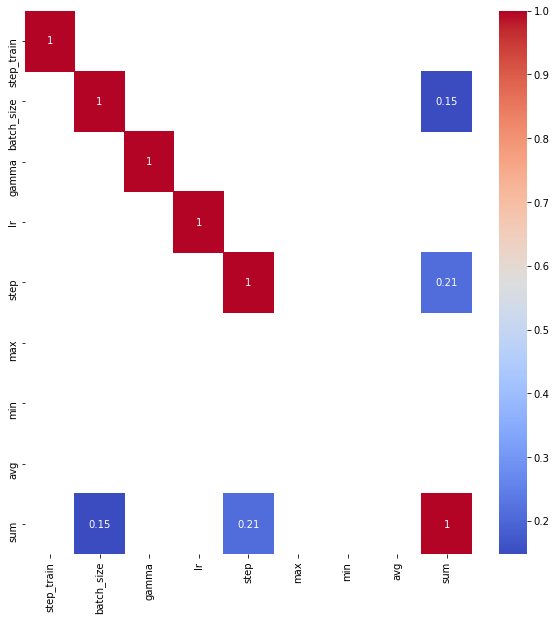

In [67]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_DQN.corr()[df_DQN.corr() > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

### DoubleDQN

In [20]:
df_DoubleDQN = df[df["algo"] == "DoubleDQN"].copy()

In [21]:
df_DoubleDQN.corr()

,step_train,batch_size,gamma,lr,step,max,min,avg,sum
step_train,1.000000e+00,6.254152e-18,-3.338836e-15,-1.947613e-17,5.190625e-20,NaN,NaN,NaN,-2.016153e-01
batch_size,6.254152e-18,1.000000e+00,-5.096548e-15,1.309431e-16,0.000000e+00,NaN,NaN,NaN,1.556979e-01
gamma,-3.338836e-15,-5.096548e-15,1.000000e+00,1.070395e-14,-1.030754e-16,NaN,NaN,NaN,2.291126e-16
lr,-1.947613e-17,1.309431e-16,1.070395e-14,1.000000e+00,-3.622535e-19,NaN,NaN,NaN,-1.461935e-01
step,5.190625e-20,0.000000e+00,-1.030754e-16,-3.622535e-19,1.000000e+00,NaN,NaN,NaN,1.829836e-01
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sum,-2.016153e-01,1.556979e-01,2.291126e-16,-1.461935e-01,1.829836e-01,NaN,NaN,NaN,1.000000e+00


In [22]:
max(df_DoubleDQN["sum"]), min(df_DoubleDQN["sum"])

(500.0, 8.0)

In [23]:
df_DoubleDQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(20)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
2117,DoubleDQN,1.0,64.0,0.99,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.0001,ExperienceReplay,128,332.0,1.0,1.0,1.0,500.0
1953,DoubleDQN,1.0,32.0,0.99,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.0010,ExperienceReplay,128,498.0,1.0,1.0,1.0,500.0
2118,DoubleDQN,1.0,64.0,0.99,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.0001,ExperienceReplay,128,498.0,1.0,1.0,1.0,500.0
2089,DoubleDQN,1.0,64.0,0.99,EpsilonGreedy-0.1,SimpleNetwork,,Adam,0.0010,ExperienceReplay,128,500.0,1.0,1.0,1.0,386.0
1938,DoubleDQN,1.0,32.0,0.99,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.0001,ExperienceReplay,128,498.0,1.0,1.0,1.0,380.0
2029,DoubleDQN,1.0,64.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-50000-0,SimpleNetwork,,Adam,0.0001,ExperienceReplay,128,500.0,1.0,1.0,1.0,379.0
2008,DoubleDQN,1.0,64.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,SimpleNetwork,,Adam,0.0010,ExperienceReplay,32,498.0,1.0,1.0,1.0,369.0
1962,DoubleDQN,1.0,32.0,0.99,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.0010,ExperienceReplay,32,332.0,1.0,1.0,1.0,347.0
3132,DoubleDQN,4.0,64.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-50000-0,SimpleNetwork,,Adam,0.0010,ExperienceReplay,32,332.0,1.0,1.0,1.0,337.0
3134,DoubleDQN,4.0,64.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-50000-0,SimpleNetwork,,Adam,0.0010,ExperienceReplay,32,500.0,1.0,1.0,1.0,326.0


<AxesSubplot:>

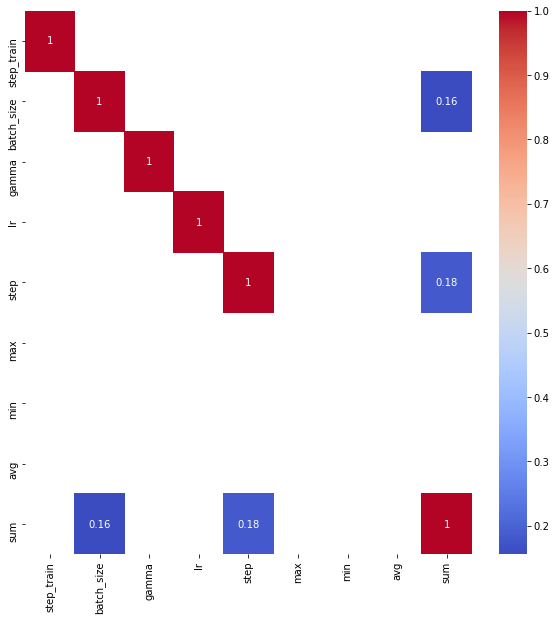

In [68]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_DoubleDQN.corr()[df_DoubleDQN.corr() > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

### DuelingDQN

In [24]:
df_DuelingDQN = df[df["algo"] == "DuelingDQN"].copy()

In [25]:
df_DuelingDQN.corr()

,step_train,batch_size,gamma,lr,step,max,min,avg,sum
step_train,1.000000e+00,6.254152e-18,-3.338836e-15,-1.947613e-17,5.190625e-20,NaN,NaN,NaN,-2.254267e-01
batch_size,6.254152e-18,1.000000e+00,-5.096548e-15,1.309431e-16,0.000000e+00,NaN,NaN,NaN,1.375869e-01
gamma,-3.338836e-15,-5.096548e-15,1.000000e+00,1.070395e-14,-1.030754e-16,NaN,NaN,NaN,-4.766649e-16
lr,-1.947613e-17,1.309431e-16,1.070395e-14,1.000000e+00,-3.622535e-19,NaN,NaN,NaN,-2.261230e-01
step,5.190625e-20,0.000000e+00,-1.030754e-16,-3.622535e-19,1.000000e+00,NaN,NaN,NaN,2.421773e-01
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sum,-2.254267e-01,1.375869e-01,-4.766649e-16,-2.261230e-01,2.421773e-01,NaN,NaN,NaN,1.000000e+00


In [26]:
max(df_DuelingDQN["sum"]), min(df_DuelingDQN["sum"])

(500.0, 8.0)

In [27]:
df_DuelingDQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(20)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
6173,DuelingDQN,4.0,32.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-50000-0,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,16,498.0,1.0,1.0,1.0,500.0
6448,DuelingDQN,4.0,64.0,0.99,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,32,498.0,1.0,1.0,1.0,500.0
5087,DuelingDQN,1.0,32.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-50000-0,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,128,332.0,1.0,1.0,1.0,421.0
6354,DuelingDQN,4.0,64.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-50000-0,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,16,500.0,1.0,1.0,1.0,386.0
4932,DuelingDQN,1.0,1.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-50000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,32,332.0,1.0,1.0,1.0,379.0
4918,DuelingDQN,1.0,1.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-50000-0,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,32,498.0,1.0,1.0,1.0,376.0
5274,DuelingDQN,1.0,64.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-50000-0,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,16,500.0,1.0,1.0,1.0,372.0
6449,DuelingDQN,4.0,64.0,0.99,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,32,500.0,1.0,1.0,1.0,337.0
5017,DuelingDQN,1.0,1.0,0.99,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,16,332.0,1.0,1.0,1.0,335.0
5358,DuelingDQN,1.0,64.0,0.99,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,128,498.0,1.0,1.0,1.0,330.0


<AxesSubplot:>

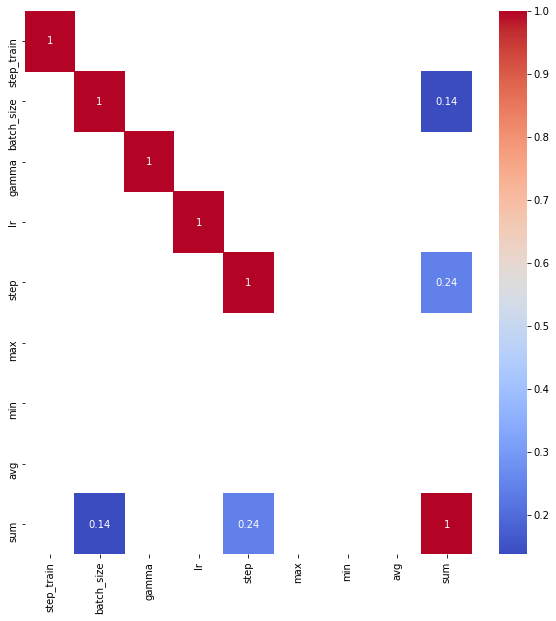

In [69]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_DuelingDQN.corr()[df_DuelingDQN.corr() > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

### CategoricalDQN

In [28]:
df_CategoricalDQN = df[df["algo"] == "CategoricalDQN"].copy()

In [29]:
df_CategoricalDQN.corr()

,step_train,batch_size,gamma,lr,step,max,min,avg,sum
step_train,1.000000e+00,6.254152e-18,-3.338836e-15,-1.947613e-17,5.190625e-20,NaN,NaN,NaN,6.569585e-02
batch_size,6.254152e-18,1.000000e+00,-5.096548e-15,1.309431e-16,0.000000e+00,NaN,NaN,NaN,-4.414052e-02
gamma,-3.338836e-15,-5.096548e-15,1.000000e+00,1.070395e-14,-1.030754e-16,NaN,NaN,NaN,4.203546e-16
lr,-1.947613e-17,1.309431e-16,1.070395e-14,1.000000e+00,-3.622535e-19,NaN,NaN,NaN,-2.343891e-02
step,5.190625e-20,0.000000e+00,-1.030754e-16,-3.622535e-19,1.000000e+00,NaN,NaN,NaN,-5.528580e-02
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sum,6.569585e-02,-4.414052e-02,4.203546e-16,-2.343891e-02,-5.528580e-02,NaN,NaN,NaN,1.000000e+00


In [30]:
max(df_CategoricalDQN["sum"]), min(df_CategoricalDQN["sum"])

(405.0, 8.0)

In [31]:
df_CategoricalDQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(20)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
567,CategoricalDQN,32.0,1.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,C51Network,,Adam,0.0010,ExperienceReplay,32,332.0,1.0,1.0,1.0,405.0
1110,CategoricalDQN,4.0,1.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,C51Network,,Adam,0.1000,ExperienceReplay,128,1.0,1.0,1.0,1.0,108.0
300,CategoricalDQN,1.0,32.0,0.99,EpsilonGreedy-0.1,C51Network,,Adam,0.1000,ExperienceReplay,128,1.0,1.0,1.0,1.0,105.0
1505,CategoricalDQN,4.0,64.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-50000-0,C51Network,,Adam,0.0010,ExperienceReplay,16,1.0,1.0,1.0,1.0,74.0
685,CategoricalDQN,32.0,1.0,0.99,EpsilonGreedy-0.6,C51Network,,Adam,0.0001,ExperienceReplay,32,1.0,1.0,1.0,1.0,71.0
689,CategoricalDQN,32.0,1.0,0.99,EpsilonGreedy-0.6,C51Network,,Adam,0.0001,ExperienceReplay,32,500.0,1.0,1.0,1.0,67.0
543,CategoricalDQN,32.0,1.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,C51Network,,Adam,0.0001,ExperienceReplay,128,498.0,1.0,1.0,1.0,59.0
435,CategoricalDQN,1.0,64.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-50000-0,C51Network,,Adam,0.1000,ExperienceReplay,128,1.0,1.0,1.0,1.0,46.0
1465,CategoricalDQN,4.0,64.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,C51Network,,Adam,0.0010,ExperienceReplay,32,1.0,1.0,1.0,1.0,44.0
544,CategoricalDQN,32.0,1.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-50000-0,C51Network,,Adam,0.0001,ExperienceReplay,128,500.0,1.0,1.0,1.0,44.0


<AxesSubplot:>

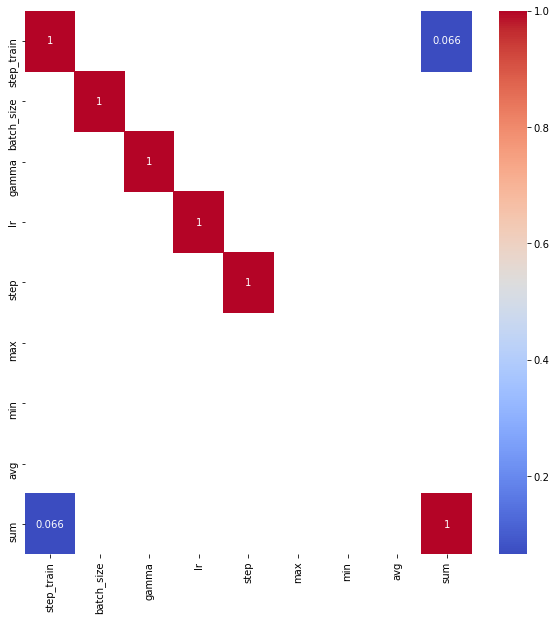

In [70]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_CategoricalDQN.corr()[df_CategoricalDQN.corr() > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)